In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile,f_classif,f_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [425]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [433]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import h2o
from bayes_opt import BayesianOptimization

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from lightgbm import LGBMRegressor,LGBMClassifier,LGBMModel
import lightgbm as lgb

/anaconda2/lib/python2.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [5]:
data=pd.read_excel('./Training sheet.xlsx')

In [6]:
data=data.set_index(data['id'])

In [7]:
del data['id']

In [8]:
data

,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
id,,,,,,,,,,,,,,
7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9
3480115,Alice in Wonderland (2010),Alice in Wonderland,2010,0,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for fantasy action/violence involving scary im...,PG,Wide,1024,9
27870115,"Dark Knight, The",The Dark Knight,2008,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,for intense sequences of violence and some men...,PG-13,Wide,1003,9
91710115,Pirates of the Caribbean: At Worlds End,Pirates of the Caribbean: At World's End,2007,1,Historical Fiction,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,961,9
50940115,Harry Potter and the Deathly Hallows: Part I,Harry Potter and the Deathly Hallows: Part I,2010,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,"for some sequences of intense action violence,...",PG-13,Wide,956,9


In [9]:
columns=[a.encode('utf-8') for a in list(data.columns)]

In [10]:
columns

['name',
 'display_name',
 'production_year',
 'movie_sequel',
 'creative_type',
 'source',
 'production_method',
 'genre',
 'language',
 'board_rating_reason',
 'movie_board_rating_display_name',
 'movie_release_pattern_display_name',
 'total',
 'Category']

In [11]:
data.isnull().any()

name                                  False
display_name                          False
production_year                       False
movie_sequel                          False
creative_type                         False
source                                False
production_method                     False
genre                                 False
language                              False
board_rating_reason                   False
movie_board_rating_display_name       False
movie_release_pattern_display_name    False
total                                 False
Category                              False
dtype: bool

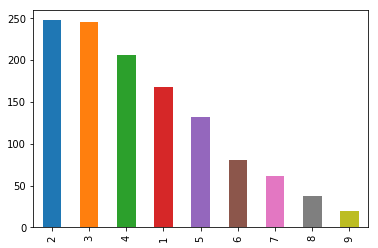

In [12]:
data['Category'].value_counts().plot(kind='bar')

In [13]:
type(data['Category'])

pandas.core.series.Series

In [14]:
Y=data['Category']

In [15]:
dictx={}

In [16]:
def addfeature(y):
    exec("dictx['col{0}']=y".format(addfeature.count))
    addfeature.count+=1
addfeature.count=0

In [17]:
def onehot(y):
    encoder=OneHotEncoder(sparse=False)
    result=encoder.fit_transform(np.asarray(y).reshape(-1,1))
    result=np.ndarray.tolist(result)
    return result

In [18]:
def minmaxnorm(y):
    norm=MinMaxScaler()
    result=norm.fit_transform(np.asarray(y).reshape(-1,1).astype('float64'))
    result=np.ndarray.tolist(result)
    return result

In [19]:
name_displayname_match=[]
for i in range(len(data)):
    if data['name'].iloc[i]==data['display_name'].iloc[i]:
        name_displayname_match.append(1)
    else:
        name_displayname_match.append(0)

In [20]:
addfeature(onehot(name_displayname_match))

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [21]:
addfeature(minmaxnorm(data['production_year']))

In [22]:
addfeature(onehot(data['movie_sequel']))

In [23]:
addfeature(onehot(data['creative_type']))

In [24]:
addfeature(onehot(data['source']))

In [25]:
addfeature(onehot(data['production_method']))

In [26]:
addfeature(onehot(data['genre']))

In [27]:
addfeature(onehot(data['language']))

In [28]:
addfeature(onehot(data['movie_board_rating_display_name']))

In [29]:
addfeature(onehot(data['movie_release_pattern_display_name']))

In [30]:
sp=lambda x : [y.encode('utf-8') for y in x.split(' ')]

In [31]:
cleanedtext=[]
for i in range(len(data)):
    temp=data['board_rating_reason'].iloc[i]
    if not temp.isalnum():
        sptemp=sp(temp)
        temp=' '.join(a for a in sptemp if a.isalnum())
    cleanedtext.append(temp.encode('utf-8'))
sequence_text=pd.Series(cleanedtext).str.get_dummies(' ')

In [32]:
sequence_text.shape

(1196, 188)

tokkk=Tokenizer()
tokkk.fit_on_texts(data['board_rating_reason'])
word_dict=tokkk.word_index
words=[a.encode('utf-8') for a in word_dict.keys()]
words

filters=SelectPercentile(f_classif,percentile=25)
inter=filters.fit_transform(inter,Y)

In [33]:
Y_onehot=onehot(Y)

In [34]:
X=[]
for i in range(len(data)):
    X.append([])

In [35]:
for k in range(len(dictx)):
    for i in range(len(data)):
        if type(dictx['col{0}'.format(k)][0])==list:                
            for j in range(len(dictx['col{0}'.format(k)][0])):
                X[i].append(abs(dictx['col{0}'.format(k)][i][j]))
        else:
            X[i].append(abs(dictx['col{0}'.format(k)][i]))

In [36]:
IndependentVariables=np.concatenate((np.asarray(X),np.asarray(sequence_text)),axis=1)

In [37]:
sampling=SMOTE(k_neighbors=5)

In [38]:
Independent_Resampled,Dependent_Resampled=sampling.fit_sample(IndependentVariables,Y)

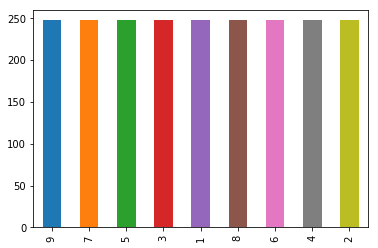

In [40]:
pd.DataFrame(data=Dependent_Resampled)[0].value_counts().plot(kind='bar')

In [133]:
X_train,X_test,Y_train,Y_test=train_test_split(Independent_Resampled,Dependent_Resampled,test_size=0.2)

<font size="5">LightGBM</font>

In [175]:
parameters = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'num_class': 9
}

In [345]:
train_lgb=lgb.Dataset(X_train,Y_train-1)

In [372]:
modellgb=lgb.train(params=parameters,train_set=train_lgb)

Test scores

In [388]:
predicted_lgb_test=modellgb.predict(data=X_test)

In [390]:
pred_lgb_test=[np.argmax(i)+1 for i in predicted_lgb_test]

In [391]:
float(sum(pred_lgb_test==Y_test))/len(pred_lgb_test)#accuracy

0.6

In [392]:
precision_score(y_pred=pred_lgb_test,y_true=Y_test,average='weighted')#precision

0.5981465045845659

In [393]:
recall_score(y_pred=pred_lgb_test,y_true=Y_test,average='weighted')

0.6

In [394]:
f1_score(y_pred=pred_lgb_test,y_true=Y_test,average='weighted')

0.5977687968751448

Unsampled data scores

In [395]:
predicted_lgb_original=model.predict(data=IndependentVariables)

In [396]:
pred_lgb_original=[np.argmax(i)+1 for i in predicted_original]

In [397]:
float(sum(pred_lgb_original==(Y)))/len(pred_lgb_original)#accuracy

0.7642140468227425

In [398]:
precision_score(y_pred=pred_lgb_original,y_true=Y,average='weighted')#precision

0.7684513498804001

In [399]:
recall_score(y_pred=pred_lgb_original,y_true=Y,average='weighted')#recall

0.7642140468227425

In [400]:
f1_score(y_pred=pred_lgb_original,y_true=Y,average='weighted')#f1-score

0.7644396913234874

<font size="5">Random forest</font>

In [501]:
def Rf_optimizer(bootstrap,min_samples_leaf,n_estimators):
    m=RandomForestClassifier(bootstrap=bootstrap,min_samples_leaf=int(round(min_samples_leaf)),n_estimators=int(round(n_estimators)))
    m.fit(X=X_train,y=Y_train)
    pre=m.predict(X=X_test)
    score=float(sum(pre==Y_test))/len(pre)
    return score

In [502]:
bounds={'bootstrap':(True,False),'min_samples_leaf':(1,10),'n_estimators':(10,30)}

In [503]:
optimizer=BayesianOptimization(f=Rf_optimizer,pbounds=bounds,random_state=1)

In [504]:
optimizer.maximize(n_iter=100)

|   iter    |  target   | bootstrap | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.5146   |  0.583    |  7.483    |  10.0     |
|  2        |  0.5663   |  0.6977   |  2.321    |  11.85    |
|  3        |  0.5865   |  0.8137   |  4.11     |  17.94    |
|  4        |  0.5843   |  0.4612   |  4.773    |  23.7     |
|  5        |  0.5146   |  0.7955   |  8.903    |  10.55    |
|  6        |  0.6697   |  1.0      |  1.038    |  29.9     |
|  7        |  0.6562   |  1.0      |  1.004    |  29.87    |
|  8        |  0.5438   |  1.0      |  9.962    |  29.92    |
|  9        |  0.5371   |  1.0      |  9.991    |  19.62    |
|  10       |  0.5685   |  1.0      |  5.607    |  29.99    |
|  11       |  0.5416   |  1.0      |  9.981    |  24.91    |
|  12       |  0.6584   |  1.0      |  1.001    |  19.45    |
|  13       |  0.5371   |  1.0      |  9.953    |  14.92    |
|  14       |  0.6607   |  1.0      |  1.006    |  10.01    |
|  15   

In [505]:
optimizer.max

{'params': {'bootstrap': 1.0,
  'min_samples_leaf': 1.0392088518278828,
  'n_estimators': 23.195366958077926},
 'target': 0.6741573033707865}

In [506]:
Rf=RandomForestClassifier(bootstrap=True,n_estimators=23)

In [507]:
Rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [508]:
modelRF=Rf.fit(X=X_train,y=Y_train)

Test Score

In [509]:
predicted_RF_test=modelRF.predict(X=X_test)

In [510]:
modelRF_crossfold=RandomForestClassifier(bootstrap=True,n_estimators=23)
crossfold_RF=cross_val_score(modelRF_crossfold,Independent_Resampled,Dependent_Resampled,cv=5)
crossfold_RF.mean()

0.6609614512471655

In [511]:
precision_score(y_pred=predicted_RF_test,y_true=Y_test,average='weighted')#precision

0.6686074800044468

In [512]:
recall_score(y_pred=predicted_RF_test,y_true=Y_test,average='weighted')

0.6629213483146067

In [513]:
f1_score(y_pred=predicted_RF_test,y_true=Y_test,average='weighted')

0.6630053432726816

Unsampled data score

In [339]:
predicted_RF_original=modelRF.predict(X=IndependentVariables)

In [340]:
float(sum(predicted_RF_original==Y))/len(predicted_RF_original)

0.8729096989966555

In [341]:
precision_score(y_pred=predicted_RF_original,y_true=Y,average='weighted')#precision

0.8756124480226509

In [342]:
recall_score(y_pred=predicted_RF_original,y_true=Y,average='weighted')#recall

0.8729096989966555

In [343]:
f1_score(y_pred=predicted_RF_original,y_true=Y,average='weighted')

0.8731015080669592

<font size="5">KNN</font>

In [524]:
def KNN_optimizer(n_neighbors,leaf_size):
    m=KNeighborsClassifier(n_neighbors=int(round(n_neighbors)),leaf_size=int(round(leaf_size)))
    m.fit(X=X_train,y=Y_train)
    pre=m.predict(X=X_test)
    score=float(sum(pre==Y_test))/len(pre)
    return score

In [543]:
bounds={'n_neighbors':(1,40),'leaf_size':(20,100)}

In [544]:
optimizer_KNN=BayesianOptimization(f=KNN_optimizer,pbounds=bounds,random_state=1)

In [545]:
optimizer_KNN.maximize(n_iter=10)

|   iter    |  target   | leaf_size | n_neig... |
-------------------------------------------------
|  1        |  0.4854   |  53.36    |  29.09    |
|  2        |  0.5393   |  20.01    |  12.79    |
|  3        |  0.6022   |  31.74    |  4.601    |
|  4        |  0.5258   |  34.9     |  14.48    |
|  5        |  0.5034   |  51.74    |  22.01    |
|  6        |  0.7011   |  100.0    |  1.0      |
|  7        |  0.4742   |  100.0    |  40.0     |
|  8        |  0.7011   |  82.16    |  1.0      |
|  9        |  0.7011   |  91.35    |  1.012    |
|  10       |  0.7011   |  70.56    |  1.0      |
|  11       |  0.7011   |  75.23    |  1.005    |
|  12       |  0.7011   |  64.96    |  1.0      |
|  13       |  0.7011   |  95.58    |  1.0      |
|  14       |  0.7011   |  70.14    |  1.0      |
|  15       |  0.7011   |  87.13    |  1.009    |


In [539]:
optimizer_KNN.max

{'params': {'leaf_size': 200.0, 'n_neighbors': 1.0},
 'target': 0.701123595505618}

In [301]:
modelknn=KNeighborsClassifier(n_neighbors=1)

In [307]:
modelknn.fit(X=X_train,y=Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

test scores

In [411]:
predicted_knn_test=modelknn.predict(X=X_test)

In [422]:
modelknn_crossfold=KNeighborsClassifier(n_neighbors=1)
crossfold_knn=cross_val_score(modelknn_crossfold,Independent_Resampled,Dependent_Resampled,cv=5)
crossfold_knn.mean()

0.708453514739229

In [414]:
precision_score(y_pred=predicted_knn_test,y_true=Y_test,average='weighted')#precision

0.6673356569380314

In [415]:
recall_score(y_pred=predicted_knn_test,y_true=Y_test,average='weighted')

0.698876404494382

In [416]:
f1_score(y_pred=predicted_knn_test,y_true=Y_test,average='weighted')

0.6760209333884852

Unsampled data score

In [406]:
predicted_knn_original=modelknn.predict(X=IndependentVariables)

In [413]:
float(sum(predicted_knn_original==Y))/len(predicted_knn_original)

0.8862876254180602

In [408]:
precision_score(y_pred=predicted_knn_original,y_true=Y,average='weighted')#precision

0.8878440017136201

In [409]:
recall_score(y_pred=predicted_knn_original,y_true=Y,average='weighted')

0.8862876254180602

In [410]:
f1_score(y_pred=predicted_knn_original,y_true=Y,average='weighted')

0.8857252497201767

In [426]:
modelNB=GaussianNB()

In [435]:
modelNB

GaussianNB(priors=None, var_smoothing=1e-09)

In [428]:
modelNB.fit(X=X_train,y=Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [429]:
predicted_NB_test=modelNB.predict(X=X_test)

In [430]:
modelknn_crossfold=KNeighborsClassifier(n_neighbors=1)
crossfold_knn=cross_val_score(modelknn_crossfold,Independent_Resampled,Dependent_Resampled,cv=5)
crossfold_knn.mean()

0.708453514739229

In [547]:
from sklearn.linear_model import LogisticRegression

In [577]:
log=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=70)

In [578]:
log.fit(X=X_train,y=Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=70, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [579]:
pred=log.predict(X=X_test)

In [580]:
float(sum(pred==Y_test))/len(pred)

0.5640449438202247

In [581]:
pred=log.predict(X=IndependentVariables)

In [582]:
float(sum(pred==Y))/len(pred)

0.49498327759197325